# Solution_Mini-Project: Linear Regression with Regularization
## Prashanth Kannadaguli
### Senior Data Science Trainer

## Problem Statement

Predict the bike-sharing counts per hour based on features including weather, day, time, humidity, wind speed, season e.t.c.

## Learning Objectives

At the end of the mini-project, you will be able to :

* perform data exploration and visualization
* implement linear regression using sklearn and optimization
* apply regularization on regression using lasso and ridge techniques
* calculate and compare the MSE value of each regression technique
* analyze the features that are best contributing to the target

### Dataset

The dataset chosen for this mini-project is [Bike Sharing Dataset](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset).  This dataset contains the hourly and daily count of rental bikes between the years 2011 and 2012 in the capital bike share system with the corresponding weather and seasonal information. This dataset consists of 17389 instances of each 16 features. 

Bike sharing systems are a new generation of traditional bike rentals where the whole process from membership, rental and return has become automatic. Through these systems, the user can easily rent a bike from a particular position and return to another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousand bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. As opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position are explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that the most important events in the city could be detected via monitoring these data.

<img src="https://s26551.pcdn.co/wp-content/uploads/2012/02/resize-va-sq-bikeshare.jpg" alt="drawing" width="400"/>

### Data Fields

* dteday - hourly date
* season - 1 = spring, 2 = summer, 3 = fall, 4 = winter
* hr - hour
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weathersit -<br>
    1 - Clear, Few clouds, Partly cloudy, Partly cloudy <br>
    2 - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
    3 - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
    4 - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog<br>   
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* cnt - number of total rentals

## Information

**Regularization:** It is a form of regression, that constrains or regularizes or shrinks the coefficient estimates towards zero. In other words, this technique discourages learning a more complex or flexible model, to avoid the risk of overfitting. A simple relation for linear regression looks like this.

$Y ≈ β_0 + β_1 X_1 + β_2 X_2 + …+ β_p X_p$

 Here $Y$ represents the learned relation and $β$ represents the coefficient estimates for different variables or predictors(X).
 
 If there is noise in the training data, then the estimated coefficients won’t generalize well to the future data. This is where regularization comes in and shrinks or regularizes these learned estimates towards zero.
 
Below are the Regularization techniques:
 
 * Ridge Regression
 * Lasso Regression
 * Elasticnet Regression

#### Importing Necessary Packages

In [ ]:
# Loading the Required Packages
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score

### Data Loading

In [ ]:
# Reading Our Dataset
bikeshare = pd.read_csv('hour.csv')

first five rows of dataset

In [ ]:
bikeshare.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
bikeshare.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

### Task flow with respect to feature processing and model training

* Identify continuous features

* Identify categorical features

* Apply scaling on continuous features 

* Apply one-hot encoding on categorical features

* Create features by concatenating all one hot encoded features and scaled features except target variables

* Find the coefficients of the features using normal equation and find the cost (error)

* Apply batch gradient descent technique by taking one target variable (cnt) and find the best coefficients

* Apply SGD Regressor using sklearn

* Apply linear regression using sklearn by taking two target variables (casual, registered)

* Apply Lasso, Ridge, Elasticnet Regression

### EDA &  Visualization

#### Visualize the hour (hr) column with an appropriate plot and find the busy hours of bike sharing

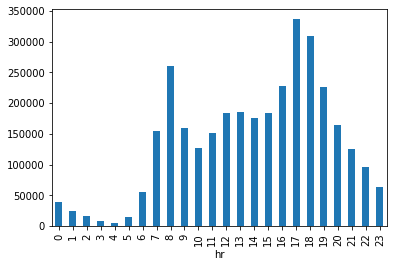

In [ ]:
bikeshare.groupby('hr').sum('cnt')['cnt'].plot.bar()

#### Visualize the distribution of count, casual and registered variables

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


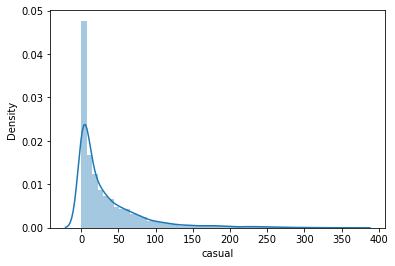

In [ ]:
# distribution of casual
sns.distplot(bikeshare.casual);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


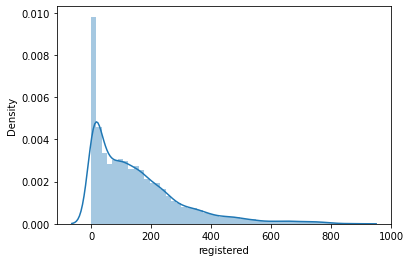

In [ ]:
# distribution of registered
sns.distplot(bikeshare.registered);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


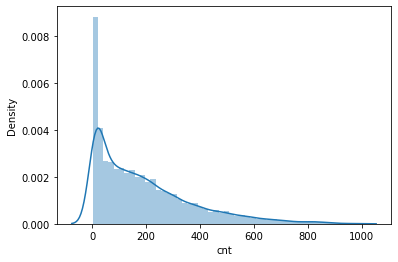

In [ ]:
# distribution of count
sns.distplot(bikeshare.cnt);

#### Describe the relation of weekday, holiday and working day

In [ ]:
# Working days from 1-5 (mon-fri)
bikeshare[bikeshare.workingday==1].weekday.unique()

array([1, 2, 3, 4, 5])

In [ ]:
# Holiday possible on working days
bikeshare[bikeshare.holiday==1].weekday.unique()

array([1, 5, 4, 3, 2])

In [ ]:
# Not a holiday, not a working day (Sun, Sat)
bikeshare[(bikeshare.holiday==0) & (bikeshare.workingday==0)].weekday.unique()

array([6, 0])

#### Visualize the monthly wise count of both casual and registered for the year 2011 and 2012 separately.

Hint: Stacked barchart

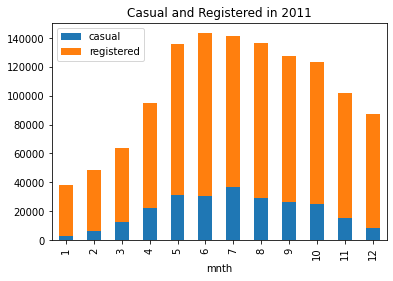

In [ ]:
# stacked bar chart for year 2011
bikeshare[bikeshare.yr==0].groupby('mnth').sum(['casual','registered'])[['casual','registered']].plot.bar(stacked=True);
plt.title("Casual and Registered in 2011")
plt.show()

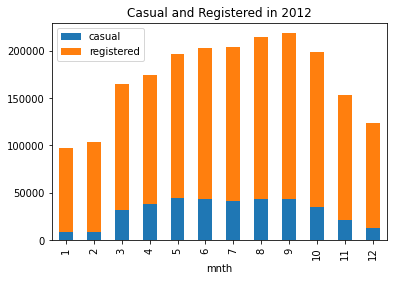

In [ ]:
# stacked bar chart for year 2012
bikeshare[bikeshare.yr==1].groupby('mnth').sum(['casual','registered'])[['casual','registered']].plot.bar(stacked=True)
plt.title("Casual and Registered in 2012")
plt.show()

#### Analyze the correlation between features with heatmap

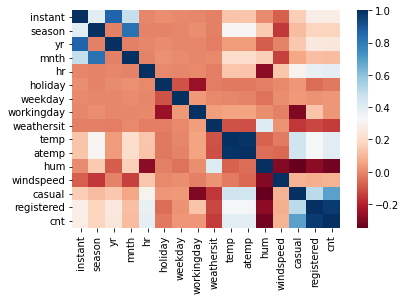

In [ ]:
sns.heatmap(bikeshare.iloc[:,:].corr(), cmap='RdBu')

#### Visualize the box plot of casual and registered variables to check the outliers

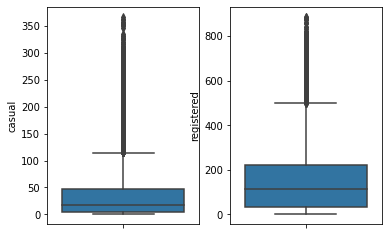

In [ ]:
fig, axes = plt.subplots(nrows=1,ncols=2)
sns.boxplot(data=bikeshare,y="casual",orient="v",ax=axes[0])
sns.boxplot(data=bikeshare,y="registered",orient="v",ax=axes[1])
plt.show()

### Pre-processing and Data Engineering

#### Drop unwanted columns

In [ ]:
bikeshare1 = bikeshare.drop(['instant', 'dteday'], axis = 1)
bikeshare1.shape

(17379, 15)

#### Identify categorical and continuous variables


In [ ]:
# Identifying categorical and continuous variables
cont_features = ['temp','atemp','hum','windspeed']
categorical_features = ['season', 'yr', 'mnth','hr','holiday','weekday','weathersit']

#### Feature scaling

Feature scaling is essential for machine learning algorithms, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance. Apply scaling on the continuous variables on the given data.

Hint: `MinMaxScaler` or `StandardScaler`



In [ ]:
std_scaler = StandardScaler()
scaled_data = pd.DataFrame(std_scaler.fit_transform(bikeshare1[cont_features]), columns = cont_features)
scaled_data.shape

(17379, 4)

In [ ]:
# scaled features + categorical in one dataframe
scaled_data
for i in categorical_features:
    scaled_data[i] = bikeshare1[i].values
scaled_data.head(2)

,temp,atemp,hum,windspeed,season,yr,mnth,hr,holiday,weekday,weathersit
0,-1.334648,-1.093281,0.947372,-1.553889,1,0,1,0,0,6,1
1,-1.438516,-1.181732,0.895539,-1.553889,1,0,1,1,0,6,1


#### Apply one-hot encode on the categorical data

One-hot encoding is applied on the categorical variables, which should not have a different weight or order attached to them, it is presumed that all categorical variables have equivalent "values". This means that you cannot simply order them from zero to the number of categories as this would imply that the earlier categories have less "value" than later categories.

Hint: `sklearn.preprocessing.OneHotEncoder`

In [ ]:
onehot = OneHotEncoder()
onehot_encoded = onehot.fit_transform(scaled_data[categorical_features]).toarray()
onehot_encoded.shape

(17379, 55)

In [ ]:
onehot_encoded

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [ ]:
cat_features = onehot.get_feature_names_out().tolist()

In [ ]:
feature_names = cont_features + cat_features
feature_names

['temp',
 'atemp',
 'hum',
 'windspeed',
 'season_1',
 'season_2',
 'season_3',
 'season_4',
 'yr_0',
 'yr_1',
 'mnth_1',
 'mnth_2',
 'mnth_3',
 'mnth_4',
 'mnth_5',
 'mnth_6',
 'mnth_7',
 'mnth_8',
 'mnth_9',
 'mnth_10',
 'mnth_11',
 'mnth_12',
 'hr_0',
 'hr_1',
 'hr_2',
 'hr_3',
 'hr_4',
 'hr_5',
 'hr_6',
 'hr_7',
 'hr_8',
 'hr_9',
 'hr_10',
 'hr_11',
 'hr_12',
 'hr_13',
 'hr_14',
 'hr_15',
 'hr_16',
 'hr_17',
 'hr_18',
 'hr_19',
 'hr_20',
 'hr_21',
 'hr_22',
 'hr_23',
 'holiday_0',
 'holiday_1',
 'weekday_0',
 'weekday_1',
 'weekday_2',
 'weekday_3',
 'weekday_4',
 'weekday_5',
 'weekday_6',
 'weathersit_1',
 'weathersit_2',
 'weathersit_3',
 'weathersit_4']

#### Specify features and targets after applying scaling and one-hot encoding

In [ ]:
features = np.concatenate((scaled_data[['temp','atemp','hum','windspeed']].values, onehot_encoded), axis=1)
features.shape

(17379, 59)

In [ ]:
target = bikeshare1[['casual','registered','cnt']]
target.shape

(17379, 3)

### Feature scaling and One-hot encoding using Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Create pipeline to Scale numerical features
num_pipeline = Pipeline([
                         ('imputer', SimpleImputer(strategy="median")),             # to handle missing values if any
                         ('std_scaler', StandardScaler())
                         ])

from sklearn.compose import ColumnTransformer
''' ColumnTransformer applies each transformer to the appropriate columns and concatenates the outputs along the second axis. ''' 
full_pipeline = ColumnTransformer([
                                   ("num", num_pipeline, cont_features),                 ## cont_features = ['temp','atemp','hum','windspeed']
                                   ("cat", OneHotEncoder(), categorical_features)])      ## categorical_features = ['season', 'yr', 'mnth','hr','holiday','weekday','weathersit']

features1 = full_pipeline.fit_transform(bikeshare1).toarray()
features1.shape

(17379, 59)

### Implement the linear regression by finding the coefficients using below approaches (2 points)

* Find the coefficients using normal equation

* (Optional) Implement batch gradient descent 

* (Optional) SGD Regressor from sklearn

#### Select the features and target and split the dataset

As there are 3 target variables, choose the count (`cnt`) variable.

In [ ]:
target1 = bikeshare1[['cnt']]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, target1)
x_train.shape, y_train.shape

((13034, 59), (13034, 1))

#### Implementation using Normal Equation

$\theta = (X^T X)^{-1} . (X^T Y)$

$θ$ is the hypothesis parameter that defines the coefficients

$X$ is the input feature value of each instance

$Y$ is Output value of each instance

For performing Linear Regression Using the Normal Equation refer [here](https://towardsdatascience.com/performing-linear-regression-using-the-normal-equation-6372ed3c57).

To solve the normal equation compute least-squares solution by using `scipy.linalg`

Hint: [scipy.linalg.lstsq](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html)

In [ ]:
y = y_train.values
# Adding ones to X
X = np.append(np.ones((x_train.shape[0],1)),x_train, axis=1)
X.shape

(13034, 60)

In [ ]:
# X_transpose * X
X_t = np.transpose(X)
X_Xt_dot = X_t.dot(X)

# inverse of (X * X_transpose)
temp1 = np.linalg.inv(X_Xt_dot)
temp1.shape

(60, 60)

In [ ]:
# X_transpose * Y
temp2 = X_t.dot(y)
# Inverse of (X_transpose * X) * (X_transpose * Y)
coefs = temp1.dot(temp2)
coefs.shape

(60, 1)

In [ ]:
# Above steps in one line
y = y_train.values
X_b = np.concatenate((np.ones((x_train.shape[0], 1)), x_train),axis=1)
theta_star = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_star.shape

(60, 1)

In [ ]:
ypredict = X_b.dot(theta_star.ravel())
mean_squared_error(ypredict, y_train.values)

2996615.6967409183

In [ ]:
def Calc_MSE(X, y_test, coefficients):

    X = np.append(np.ones((X.shape[0],1)),X, axis=1)
    score = mean_squared_error(y_test.values, X.dot(coefficients))
    return score

In [ ]:
# objective(X,y, coefs)
train_error = Calc_MSE(x_train, y_train, coefs)
test_error = Calc_MSE(x_test, y_test, coefs)
train_error, test_error

(5041920.592171668, 5021877.463953585)

In [ ]:
from scipy.linalg import lstsq

x_train, x_test, y_train, y_test = train_test_split(features, target1)
y = y_train.values
X = np.append(np.ones((x_train.shape[0],1)),x_train, axis=1)
p, res, rnk, s = lstsq(X, y)
print(np.sum((X.dot(p)-y)**2)/X.shape[0])

10334.841617360498


#### (Optional) Implementing Linear regression using batch gradient descent

Initialize the random coefficients and optimize the coefficients in the iterative process by calculating cost and finding the gradient.

Hint: [link](https://medium.com/@lope.ai/multivariate-linear-regression-from-scratch-in-python-5c4f219be6a)

In [ ]:
X = x_train
y = y_train
# Adding ones to X
X = np.append(np.ones((X.shape[0],1)),X, axis=1)
X.shape

(13034, 60)

In [ ]:
def cost_function(X, Y, B):
  return mean_squared_error(Y, X.dot(B))

In [ ]:
def batch_gradient_descent(X, Y, B, alpha, iterations):
  cost_history = [0] * iterations
  m = len(Y)
  for iteration in range(iterations):
    #print(iteration)
    h = X.dot(B)
    loss = h - Y #change the variable name
    gradient = X.T.dot(loss) / m
    B = B - alpha * gradient
    cost = cost_function(X, Y, B)
    cost_history[iteration] = cost
  return B, cost_history

B = np.random.randn(X.shape[1])
alpha = 0.005
iter_ = 50000
newB, cost_history = batch_gradient_descent(X, y.values.ravel(), B, alpha, iter_)
newB, cost_history[-1]

(array([  56.21674626,   27.93080191,   18.44144189,  -16.80737591,
          -3.19010903,  -23.3179477 ,   16.32192717,   13.65362241,
          47.16612532,  -14.69592466,   71.86977373,    2.19775905,
           6.84138725,   14.82956587,    4.43273338,   17.161708  ,
           0.30852262,  -20.66202811,    3.69407299,   25.95719107,
          16.44390359,  -10.86201193,   -6.93735465, -120.51416437,
        -138.0121785 , -145.7919766 , -156.97495821, -162.29540158,
        -144.3024988 ,  -83.08654594,   48.40137384,  188.95118197,
          41.54699728,  -13.35238218,   10.32362649,   48.90261388,
          41.6873891 ,   29.95549797,   40.96470008,  102.83606645,
         254.41659857,  218.68565456,  113.10519588,   36.77915819,
         -13.33560856,  -50.49346149,  -89.90509454,   40.56810458,
          16.11050731,   -3.57094128,    5.66853799,    6.93301319,
          12.10670035,    6.83331795,   13.19353764,   14.02382696,
          43.4901365 ,   34.10665257,  -18.81343

In [ ]:
# test error
X_test = np.append(np.ones((x_test.shape[0],1)),x_test, axis=1)
cost_function(X_test,y_test, newB)

10308.513900550772

#### (Optional) SGD Regressor

Use the SGD regressor from sklearn with one target variable and find the error

Hint: [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)

In [ ]:
sgd = linear_model.SGDRegressor()
sgd = sgd.fit(x_train, y_train)
print("score is ",sgd.score(x_test, y_test))
mean_squared_error(sgd.predict(x_test), y_test )

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


score is  0.6832267555279239


10320.83011580495

### Linear regression using sklearn

Implement the linear regression model using sklearn with two variables in target (casual, registered)

Hint: [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

#### Select the features  and split the data into train and test

In [ ]:
target2 = bikeshare1['cnt']

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(features, target1)
xtrain.shape, ytrain.shape

((13034, 59), (13034, 1))

In [ ]:
regr_linear = linear_model.LinearRegression()
regr_linear.fit(xtrain, ytrain)
predicted = regr_linear.predict(xtest)

#### Calculate the mean squared error of the actual and predicted data

In [ ]:
mse_linear = mean_squared_error(ytest, predicted, multioutput = 'uniform_average')
mse_linear

10568.593867224836

#### Calculate the $R^2$ (coefficient of determination) of the actual and predicted data

In [ ]:
r2_score(ytrain, regr_linear.predict(xtrain)), r2_score(ytest, predicted)

(0.6875109481921717, 0.6815606638709293)

#### summarize the importance of features and create a bar chart

Prediction is the weighted sum of the input values e.g. linear regression, and extensions that add regularization, such as ridge regression and the elastic net find a set of coefficients to use in the weighted sum to make a prediction. These coefficients can be used directly as a crude type of feature importance score.

This assumes that the input variables have the same scale or have been scaled prior to fitting a model.

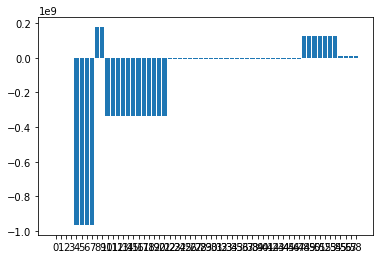

In [ ]:
# coefficients of casual variable
importance_casual = regr_linear.coef_[0,]
plt.bar([x for x in range(len(importance_casual))], importance_casual)
plt.xticks(range(59))
plt.show()

In [ ]:
# coefficients of registered variable
# importance_registered = regr_linear.coef_[1,]
# plt.bar([x for x in range(len(importance_registered))], importance_registered)
# plt.xticks(range(59))
# plt.show()

### Regularization methods

#### Apply lasso regression

* Apply Lasso regression with different alpha values given below and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted

Hint: [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

In [ ]:
# setting up alpha
alpha = [0.0001, 0.001,0.01, 0.1, 1, 10, 100]

In [ ]:
for a in alpha:
    regr_lasso = linear_model.Lasso(alpha = a)
    regr_lasso.fit(xtrain, ytrain)
    mse_lasso_sk = mean_squared_error(ytest, regr_lasso.predict(xtest), multioutput = 'uniform_average')
    print(a, "=====",mse_lasso_sk) 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.047e+07, tolerance: 4.275e+04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


0.0001 ===== 10568.590592897426


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.325e+05, tolerance: 4.275e+04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


0.001 ===== 10568.518870204214
0.01 ===== 10567.85291808459
0.1 ===== 10571.171907983366
1 ===== 11328.794466553887
10 ===== 23828.5268541767
100 ===== 33193.22411890624


In [ ]:
# with best alpha chosen from above
regr_lasso = linear_model.Lasso(alpha = 0.0001)
regr_lasso.fit(xtrain, ytrain)
mse_lasso_sk = mean_squared_error(ytest, regr_lasso.predict(xtest), multioutput = 'uniform_average')
print("Lasso MSE:",mse_lasso_sk)
print("Lasso r2_score",r2_score(ytrain, regr_lasso.predict(xtrain)))

Lasso MSE: 10568.590592897426
Lasso r2_score 0.6875109464964226


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.047e+07, tolerance: 4.275e+04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


#### Apply ridge regression

* Apply Lasso regression with different alpha values given and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted

Hint: [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

In [ ]:
for a in alpha:
    regr_ridge = linear_model.Ridge(alpha = a)
    regr_ridge.fit(xtrain, ytrain)
    mse_ridge_sk = mean_squared_error(ytest, regr_ridge.predict(xtest), multioutput = 'uniform_average')
    print(a, "=====",mse_ridge_sk)

0.0001 ===== 10568.593904291594
0.001 ===== 10568.594254665048
0.01 ===== 10568.597763600816
0.1 ===== 10568.633373350513
1 ===== 10569.041662878008
10 ===== 10578.170298550973
100 ===== 10980.135410723007


In [ ]:
# with best alpha chosen from above
regr_ridge = linear_model.Ridge(alpha = 0.001)
regr_ridge.fit(xtrain, ytrain)
mse_ridge_sk = mean_squared_error(ytest, regr_ridge.predict(xtest), multioutput = 'uniform_average')
print("Ridge MSE:",mse_ridge_sk)
print("Ridge r2_score:",r2_score(ytrain, regr_ridge.predict(xtrain)))

Ridge MSE: 10568.594254665048
Ridge r2_score: 0.6875109481952683


#### Apply elasticnet regression

* Apply elasticnet regression with different alpha values given and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted

Hint: [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)

In [ ]:
for a in alpha:
    elasticnet_regr = linear_model.ElasticNet(alpha=a)
    elasticnet_regr.fit(xtrain, ytrain)
    mse_elatic_sk = mean_squared_error(ytest, elasticnet_regr.predict(xtest), multioutput = 'uniform_average')
    print(a,"====",mse_elatic_sk)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.457e+07, tolerance: 4.275e+04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


0.0001 ==== 10568.878253692403


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.372e+05, tolerance: 4.275e+04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


0.001 ==== 10573.569562540411
0.01 ==== 10780.709871560475
0.1 ==== 14580.676102827045
1 ==== 22168.677514507763
10 ==== 29370.319931598577
100 ==== 33045.356355060285


In [ ]:
# Elasticnet
elasticnet_regr = linear_model.ElasticNet(alpha=0.01)
elasticnet_regr.fit(xtrain, ytrain)
mse_elatic_sk = mean_squared_error(ytest, elasticnet_regr.predict(xtest), multioutput = 'uniform_average')
print("Elasticnet MSE:",mse_elatic_sk)
print("Elasticnet r2_score",r2_score(ytrain, elasticnet_regr.predict(xtrain)))

Elasticnet MSE: 10780.709871560475
Elasticnet r2_score 0.6815570494881621


* **Use the two variables (`Casual, Registered`) in target and find the error by implementing Linear Regression model from sklearn**
* Describe your interpretation of the methods that are used to implement linear regression covered in this mini project.
* Comment on performance of the algorithms/methods used.
* Comment about the nature of the data and fitment of linear regression for this data.
* Can you perform a non linear curve fitting using linear regression? If yes, How?


#### Solution of Linear regression with 2 variables

In [ ]:
target2 = bikeshare1[['casual','registered']]

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(features, target2)
xtrain.shape, ytrain.shape

((13034, 59), (13034, 2))

In [ ]:
regr_linear = linear_model.LinearRegression()
regr_linear.fit(xtrain, ytrain)
predicted = regr_linear.predict(xtest)
predicted.shape

(4345, 2)

In [ ]:
predicted

array([[ 38.30664062, 257.0625    ],
       [ 71.40429688, 407.78125   ],
       [ 48.7421875 , 155.09375   ],
       ...,
       [-29.01757812, -12.125     ],
       [-11.81835938,  96.40625   ],
       [ 29.10742188,  79.8125    ]])

In [ ]:
mse_linear = mean_squared_error(ytest, predicted, multioutput = 'uniform_average')
mse_linear

4120.642285668534

In [ ]:
r2_score(ytrain, regr_linear.predict(xtrain)), r2_score(ytest, predicted)

(0.6344983850245371, 0.6388980057277084)

### References from Professor and Mentors:

Handling cyclical features: http://blog.davidkaleko.com/feature-engineering-cyclical-features.html

Store commonly used code snippets and miniproject notebooks in a Github repo 

Top errors: https://medium.com/ai%C2%B3-theory-practice-business/top-6-errors-novice-machine-learning-engineers-make-e82273d394db

from mlxtend.evaluate import bias_variance_decomp

To get feature names from one hot encoder use `enc.get_feature_names_out()`

Model diagnostics: https://www.geeksforgeeks.org/box-cox-transformation-using-python/